[*********************100%%**********************]  5 of 5 completed
F:\Anaconda\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Normalized Weights (Constraints): [0.22049789 0.13129279 0.23493126 0.26825118 0.14502689]
Sum of Normalized Weights (Constraints): 1.0


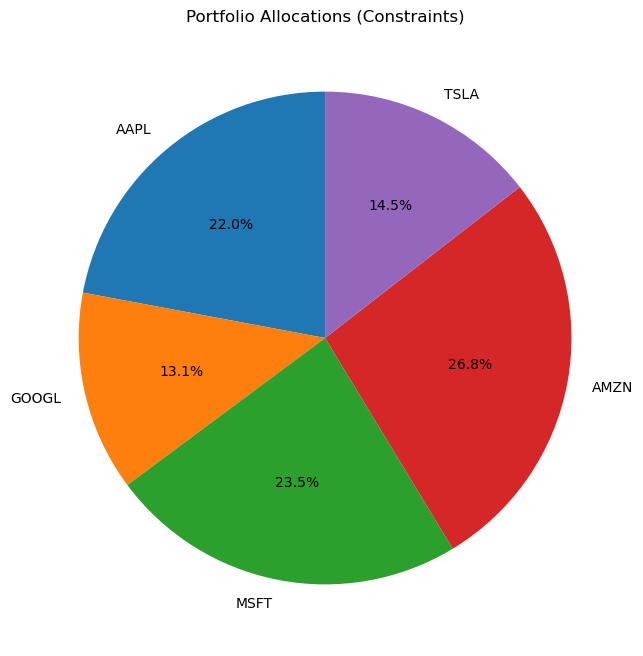

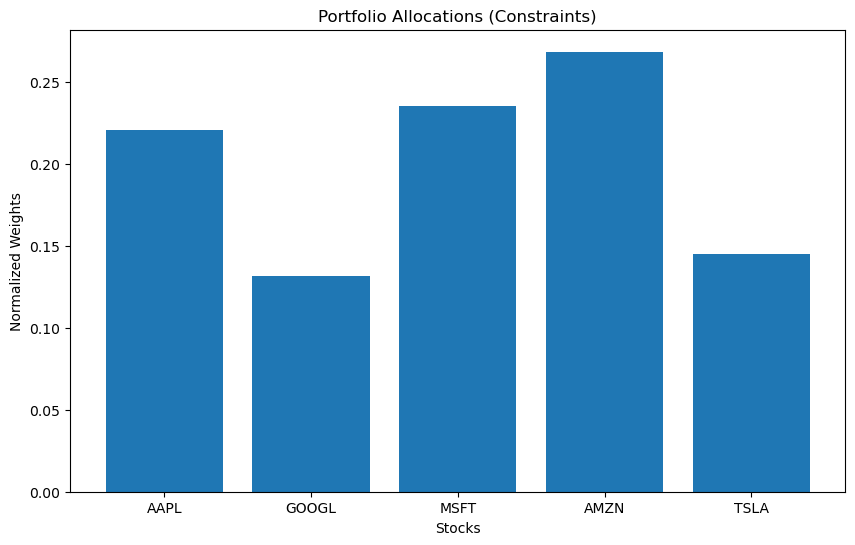

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Define the list of stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# Download historical stock data using yfinance
stock_data = yf.download(tickers, start="2021-01-01", end="2024-01-01")['Adj Close']

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define initial weights
num_stocks = len(tickers)
initial_weights = np.ones(num_stocks) / num_stocks

# Define bounds for weights (non-negativity)
bounds_non_negative = tuple((0, None) for _ in range(num_stocks))

# Define the objective function considering absolute values of weights
def objective_absolute(weights):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility + 0.001 * np.sum(np.abs(weights))

# Define the constraints (non-negativity and sum to 1)
constraints_non_negative = [{'type': 'ineq', 'fun': lambda weights: weights},
                            {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Perform the optimization with constraints
result_constraints = minimize(objective_absolute, initial_weights, method='trust-constr', bounds=bounds_non_negative, constraints=constraints_non_negative)

# Normalize the weights
normalized_weights_constraints = result_constraints.x / np.sum(result_constraints.x)

# Print the normalized weights and the sum
print("Normalized Weights (Constraints):", normalized_weights_constraints)
print("Sum of Normalized Weights (Constraints):", np.sum(normalized_weights_constraints))

# Visualize the portfolio allocations
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(normalized_weights_constraints, labels=tickers, autopct='%1.1f%%', startangle=90)
plt.title('Portfolio Allocations (Constraints)')
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(tickers, normalized_weights_constraints)
plt.xlabel('Stocks')
plt.ylabel('Normalized Weights')
plt.title('Portfolio Allocations (Constraints)')
plt.show()


In [2]:
# Calculate portfolio metrics
portfolio_return = np.dot(normalized_weights_constraints, mean_returns)
portfolio_volatility = np.sqrt(np.dot(normalized_weights_constraints.T, np.dot(cov_matrix, normalized_weights_constraints)))

# Assuming risk-free rate is 0, calculate Sharpe ratio
risk_free_rate = 0
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("Portfolio Metrics:")
print("Expected Portfolio Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Portfolio Metrics:
Expected Portfolio Return: 0.0007301916913571233
Portfolio Volatility: 0.01776473231062897
Sharpe Ratio: 0.041103444655917275


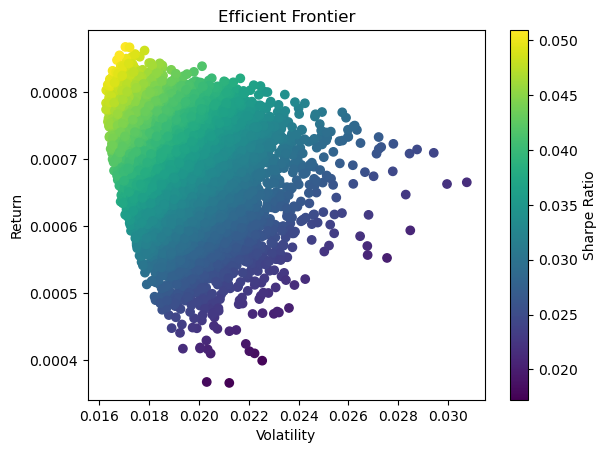

In [3]:
# Generate random portfolios for efficient frontier
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility

# Plot efficient frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()


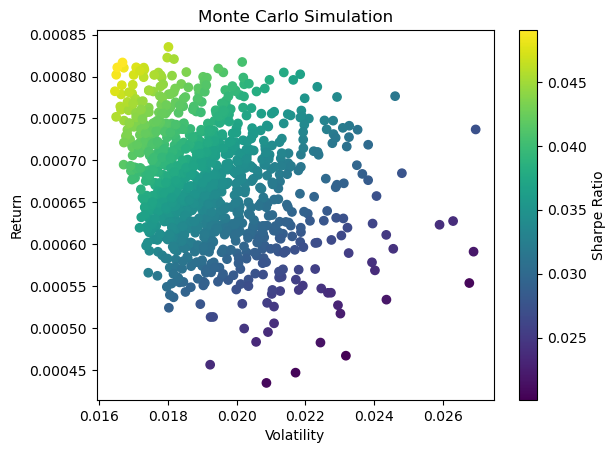

In [4]:
# Monte Carlo Simulation
num_simulations = 1000
simulation_results = np.zeros((3, num_simulations))

for i in range(num_simulations):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    simulation_results[0,i] = portfolio_return
    simulation_results[1,i] = portfolio_volatility
    simulation_results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility

# Plot Monte Carlo simulation results
plt.scatter(simulation_results[1,:], simulation_results[0,:], c=simulation_results[2,:], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.title('Monte Carlo Simulation')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()


In [5]:
# Example: Rebalance portfolio weights every quarter
rebalance_dates = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='Q')
for date in rebalance_dates:
    # Implement rebalancing logic here
    # For simplicity, let's assume quarterly rebalancing and equal-weighted portfolio
    weights = np.ones(num_stocks) / num_stocks
    # You can replace this with your own optimization or rebalancing strategy

    # Print the rebalanced weights for each quarter
    print(f"Rebalanced Weights on {date}: {weights}")


Rebalanced Weights on 2021-03-31 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2021-06-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2021-09-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2021-12-31 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2022-03-31 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2022-06-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2022-09-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2022-12-31 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2023-03-31 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2023-06-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]
Rebalanced Weights on 2023-09-30 00:00:00: [0.2 0.2 0.2 0.2 0.2]


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

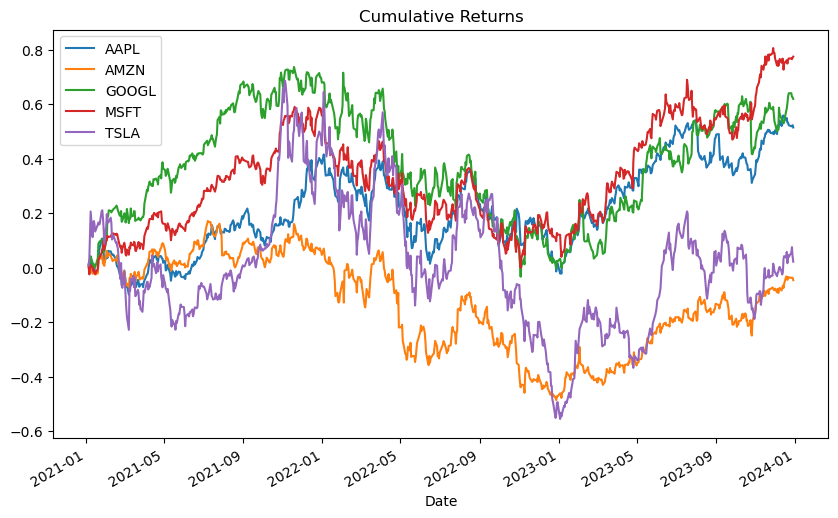

In [6]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Calculate annualized returns
annualized_returns = (1 + cumulative_returns.iloc[-1]) ** (252 / len(cumulative_returns)) - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6), title='Cumulative Returns')


In [7]:
# Example: Calculate 95% VaR and CVaR
confidence_level = 0.95
var_95 = np.percentile(simulation_results[0], 100 * (1 - confidence_level))
cvar_95 = simulation_results[0][simulation_results[0] <= var_95].mean()

print("95% VaR:", var_95)
print("95% CVaR:", cvar_95)


95% VaR: 0.0005606584834059947
95% CVaR: 0.0005315116847179187
